In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import math
import matplotlib.pyplot as plt
%matplotlib inline

import warnings ; warnings.filterwarnings('ignore')

파일 다운로드 링크
https://www.kaggle.com/c/bike-sharing-demand/data

In [2]:
train = pd.read_csv('C:/Users/tensai/python_block-main/시각화 알아보기/train.csv')
# train = pd.read_csv(r'C:\Users\11\python-study\lecture\8월 18일 Numpy\train.csv')
# train = pd.read_csv('train.csv')
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


<AxesSubplot:>

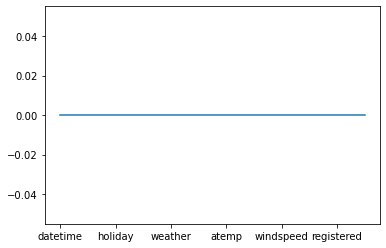

In [4]:
train.isnull().sum().plot()

# datetime 년/월/일/시간/분/초/주(월화수~일)컬럼 만들기

In [5]:
# train['datetime']  
train['datetime'] = pd.to_datetime(train['datetime'])
train['datetime']  #이렇게 사용하면 데이터전처리가능(원래 전처리시 데이터 손상가면안되지만 날짜정돈 가능)

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [6]:
# pd.to_datetime(train['datetime'])

In [7]:
train['datetime_year'] = train['datetime'].dt.year
print(train['datetime_year'].unique())
train['datetime_year']

[2011 2012]


0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: datetime_year, Length: 10886, dtype: int64

In [8]:
train['datetime_month'] = train['datetime'].dt.month
print(train['datetime_month'].unique())
train['datetime_month']

[ 1  2  3  4  5  6  7  8  9 10 11 12]


0         1
1         1
2         1
3         1
4         1
         ..
10881    12
10882    12
10883    12
10884    12
10885    12
Name: datetime_month, Length: 10886, dtype: int64

In [27]:
train['datetime_day'] = train['datetime'].dt.day
print(train['datetime_day'].unique())
train['datetime_day']

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


0         1
1         1
2         1
3         1
4         1
         ..
10881    19
10882    19
10883    19
10884    19
10885    19
Name: datetime_day, Length: 10886, dtype: int64

In [28]:
train['datetime_hour'] = train['datetime'].dt.hour
print(train['datetime_hour'].unique())
train['datetime_hour']

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


0         0
1         1
2         2
3         3
4         4
         ..
10881    19
10882    20
10883    21
10884    22
10885    23
Name: datetime_hour, Length: 10886, dtype: int64

In [29]:
train['datetime_minute'] = train['datetime'].dt.minute
print(train['datetime_minute'].unique())
train['datetime_minute'] #데이터가 하나밖에없고 0일때는 가치가없다

[0]


0        0
1        0
2        0
3        0
4        0
        ..
10881    0
10882    0
10883    0
10884    0
10885    0
Name: datetime_minute, Length: 10886, dtype: int64

In [30]:
train['datetime_second'] = train['datetime'].dt.second
print(train['datetime_second'].unique())
train['datetime_second'] #데이터가 하나밖에없고 0일때는 가치가없다

[0]


0        0
1        0
2        0
3        0
4        0
        ..
10881    0
10882    0
10883    0
10884    0
10885    0
Name: datetime_second, Length: 10886, dtype: int64

In [31]:
train['datetime_weekday']= train['datetime'].dt.day_name()
print(train['datetime_weekday'].unique())
train['datetime_weekday'] 

['Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']


0         Saturday
1         Saturday
2         Saturday
3         Saturday
4         Saturday
           ...    
10881    Wednesday
10882    Wednesday
10883    Wednesday
10884    Wednesday
10885    Wednesday
Name: datetime_weekday, Length: 10886, dtype: object

In [32]:
train['weekday']= train['datetime'].dt.weekday + 1#1을 더함으로 써 숫자가 1부터시작함(원래는 0부터)
print(train['weekday'].unique())
train['weekday'] 

[6 7 1 2 3 4 5]


0        6
1        6
2        6
3        6
4        6
        ..
10881    3
10882    3
10883    3
10884    3
10885    3
Name: weekday, Length: 10886, dtype: int64

In [35]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['datetime_year'] = train['datetime'].dt.year
train['datetime_month'] = train['datetime'].dt.month
train['datetime_day'] = train['datetime'].dt.day
train['datetime_hour'] = train['datetime'].dt.hour
train['datetime_minute'] = train['datetime'].dt.minute
train['datetime_second'] = train['datetime'].dt.second
# train['datetime_weekday'] = train['datetime'].dt.day_name()
train['weekday'] = train['datetime'].dt.weekday

train[['datetime','datetime_year','datetime_month','datetime_day','datetime_hour','datetime_minute','datetime_second','weekday']]

,datetime,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_minute,datetime_second,weekday
0,2011-01-01 00:00:00,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,2011,1,1,4,0,0,5
...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,2012,12,19,19,0,0,2
10882,2012-12-19 20:00:00,2012,12,19,20,0,0,2
10883,2012-12-19 21:00:00,2012,12,19,21,0,0,2
10884,2012-12-19 22:00:00,2012,12,19,22,0,0,2


# Countplot

In [36]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_minute,datetime_second,datetime_weekday,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,Saturday,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,Saturday,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,Saturday,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,Saturday,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,Saturday,5


<AxesSubplot:xlabel='weather', ylabel='count'>

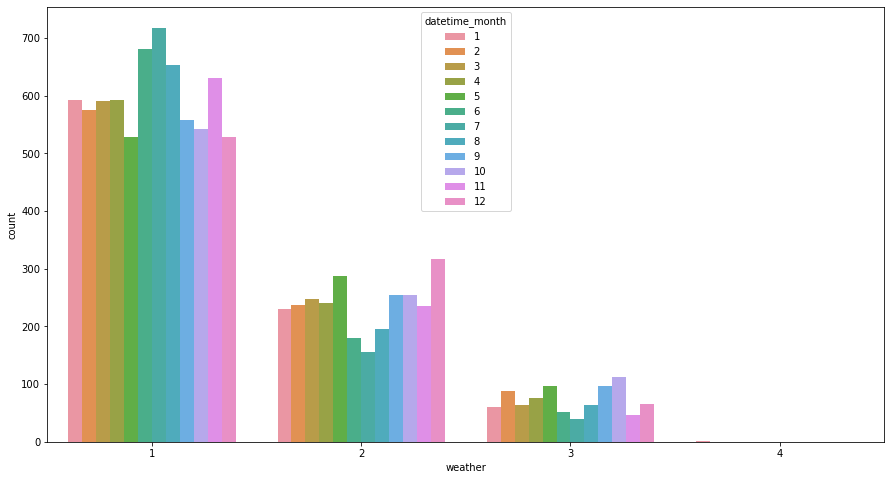

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8)) #사이즈 조정하는 부분
sns.countplot(data=train, x='weather', hue='datetime_month')#y축은 횟수,hue는 피벗테이블의 인덱스

# Barplot

In [47]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime_year,datetime_month,datetime_day,datetime_hour,datetime_minute,datetime_second,datetime_weekday,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,Saturday,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,Saturday,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,Saturday,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,Saturday,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,Saturday,5


<AxesSubplot:xlabel='datetime_year', ylabel='count'>

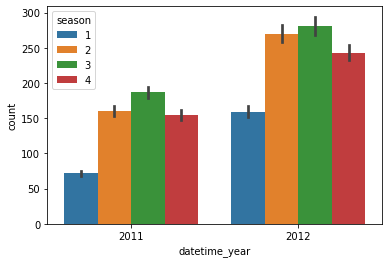

In [49]:
sns.barplot(data=train, x='datetime_year', y='count', hue='season')

<AxesSubplot:xlabel='datetime_month', ylabel='count'>

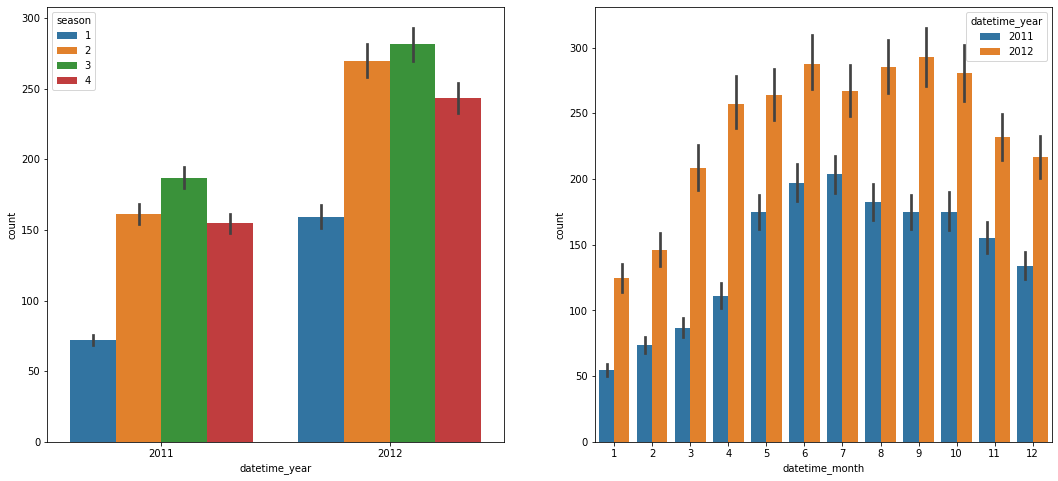

In [60]:
figure,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
figure.set_size_inches(18,8)

sns.barplot(data=train, x='datetime_year', y='count', hue='season', ax=ax1)
sns.barplot(data=train, x='datetime_month', y='count', hue='datetime_year', ax=ax2)

<AxesSubplot:xlabel='datetime_hour', ylabel='count'>

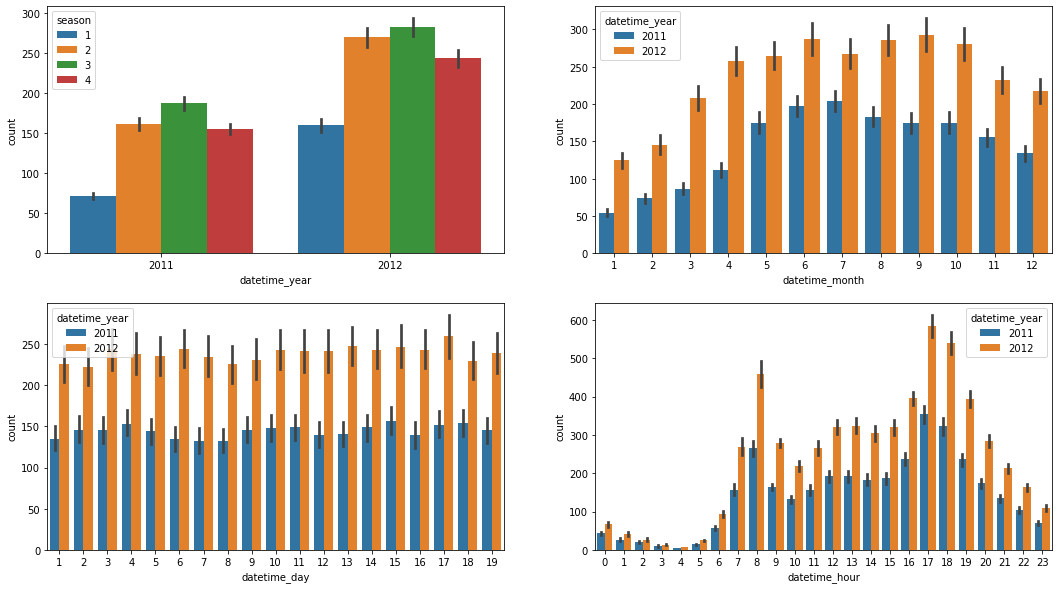

In [62]:
figure,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18,10)

sns.barplot(data=train, x='datetime_year', y='count', hue='season', ax=ax1)
sns.barplot(data=train, x='datetime_month', y='count', hue='datetime_year', ax=ax2)
sns.barplot(data=train, x='datetime_day', y='count', hue='datetime_year', ax=ax3)
sns.barplot(data=train, x='datetime_hour', y='count', hue='datetime_year', ax=ax4)

# Poitnplot

In [65]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'datetime_year', 'datetime_month', 'datetime_day', 'datetime_hour',
       'datetime_minute', 'datetime_second', 'datetime_weekday', 'weekday'],
      dtype='object')

<AxesSubplot:xlabel='windspeed', ylabel='count'>

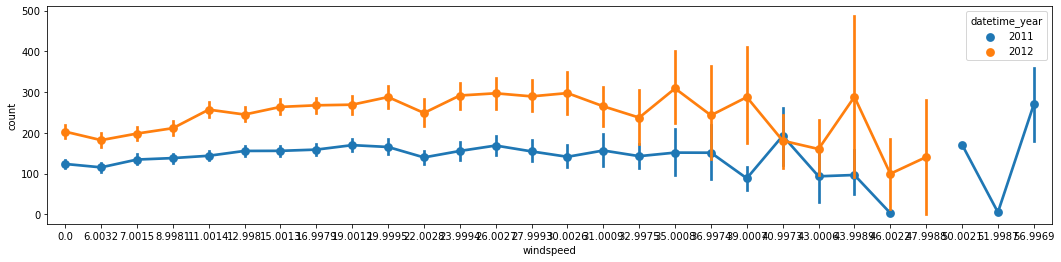

In [66]:
plt.figure(figsize=(18,4))
sns.pointplot(data=train, x='windspeed', y='count',hue='datetime_year')#소수점이 너무 많아서 보기 불편

<AxesSubplot:xlabel='windspeed_int', ylabel='count'>

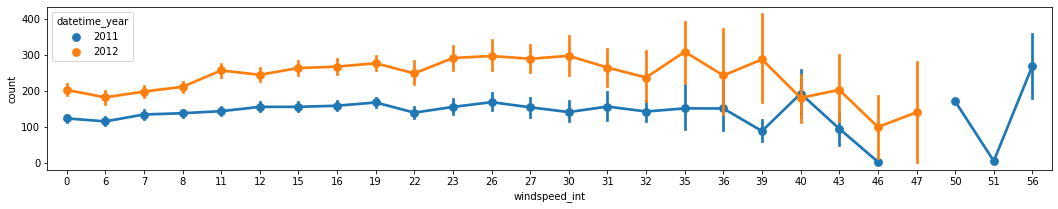

In [68]:
train['windspeed_int'] = train['windspeed'].astype(int)
plt.figure(figsize=(18,3))
sns.pointplot(data=train, x='windspeed_int', y='count',hue='datetime_year')

<AxesSubplot:xlabel='windspeed_int', ylabel='count'>

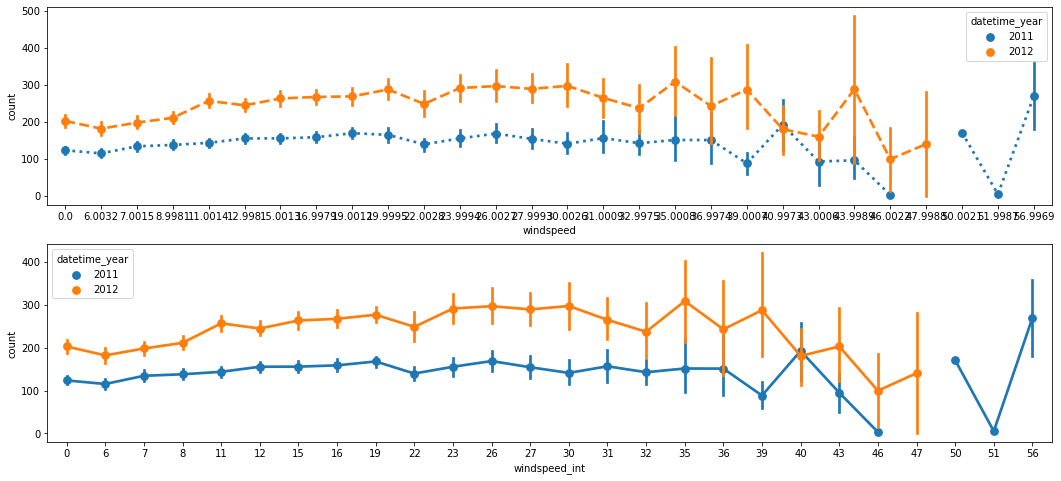

In [81]:
figure,((ax1),(ax2)) = plt.subplots(nrows=2,ncols=1)
figure.set_size_inches(18,8)

sns.pointplot(data=train, x='windspeed', y='count',hue='datetime_year',ax=ax1, linestyles=[":","--"])
sns.pointplot(data=train, x='windspeed_int', y='count',hue='datetime_year',ax=ax2)

In [77]:
print(train[(train['windspeed_int']>=0)&(train['windspeed_int']<=10)].shape)
print(train[(train['windspeed_int']>10)&(train['windspeed_int']<=20)].shape)
print(train[(train['windspeed_int']>20)&(train['windspeed_int']<=30)].shape)
print(train[(train['windspeed_int']>30)&(train['windspeed_int']<=40)].shape)
print(train[(train['windspeed_int']>40)].shape)

(4339, 21)
(5052, 21)
(1179, 21)
(287, 21)
(29, 21)


<AxesSubplot:xlabel='datetime_hour', ylabel='count'>

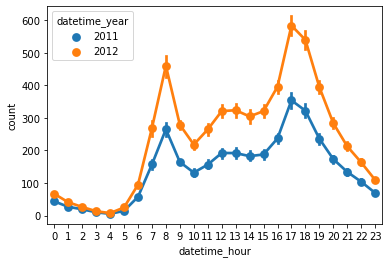

In [82]:
sns.pointplot(data=train, x='datetime_hour', y='count', hue='datetime_year')

# Distplot

<AxesSubplot:xlabel='temp', ylabel='Density'>

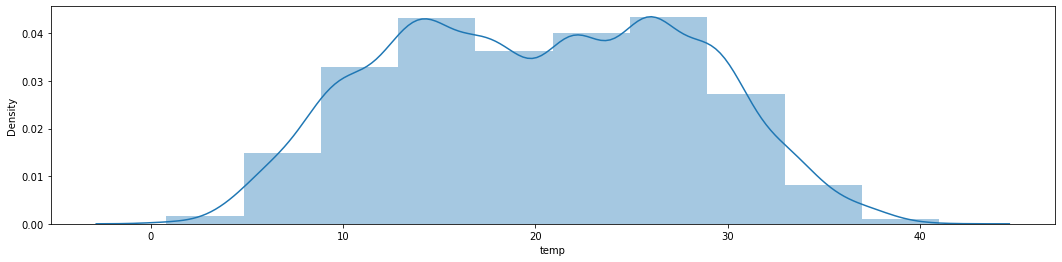

In [87]:
plt.figure(figsize=(18,4))
sns.distplot(train['temp'], hist=True, kde=True, bins=10) #distplot은 컬럼 한개만 받음

<AxesSubplot:xlabel='temp', ylabel='Density'>

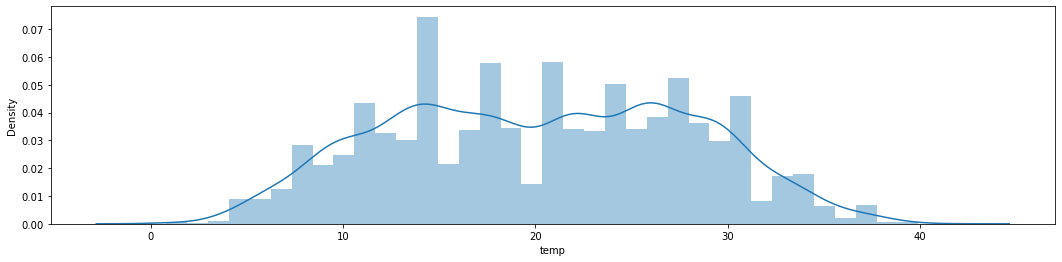

In [85]:
plt.figure(figsize=(18,4))
sns.distplot(train['temp'], hist=True) 

<AxesSubplot:xlabel='atemp', ylabel='Density'>

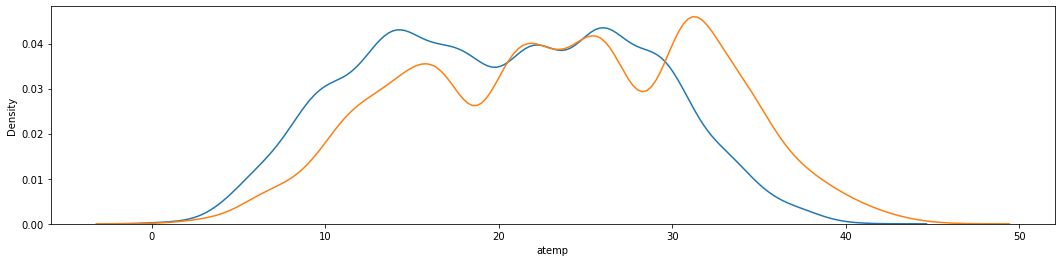

In [89]:
plt.figure(figsize=(18,4))
sns.distplot(train['temp'], hist=False, kde=True, bins=None) 
sns.distplot(train['atemp'], hist=False, kde=True, bins=None) 

### [불쾌지수=1.8x기온–0.55x(1–습도)x(1.8x기온–26)+32]

In [94]:
train["THI"]=1.8*train['temp']-0.55*(1 - 0.01*train['humidity'])*(1.8*train['temp']-26)+32
train[['temp','humidity','THI']]

,temp,humidity,THI
0,9.84,81,50.578096
1,9.02,80,49.310040
2,9.02,80,49.310040
3,9.84,75,50.851600
4,9.84,75,50.851600
...,...,...,...
10881,15.58,50,59.481900
10882,14.76,57,58.433668
10883,13.94,61,57.286766
10884,13.94,61,57.286766


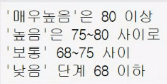

In [104]:
#one-hot-encoding
(train['THI']<68).astype(int).unique()

array([1, 0])

In [106]:
train['THI_1']=(train['THI']<68).astype(int)
train['THI_2']=((train['THI']>=68)&(train['THI']<75)).astype(int)
train['THI_3']=((train['THI']>=75)&(train['THI']<80)).astype(int)
train['THI_4']=(train['THI']>=80).astype(int)

train[(train['THI']>=68)&(train['THI']<75)][['THI','THI_1','THI_2','THI_3','THI_4']]
# train[['THI','THI_1','THI_2','THI_3','THI_4']]

,THI,THI_1,THI_2,THI_3,THI_4
819,69.342740,0,1,0,0
820,69.041120,0,1,0,0
822,68.519304,0,1,0,0
842,70.549220,0,1,0,0
843,72.714784,0,1,0,0
...,...,...,...,...,...
10518,70.090478,0,1,0,0
10660,68.540300,0,1,0,0
10661,68.120650,0,1,0,0
10662,68.180600,0,1,0,0


<AxesSubplot:xlabel='temp', ylabel='Density'>

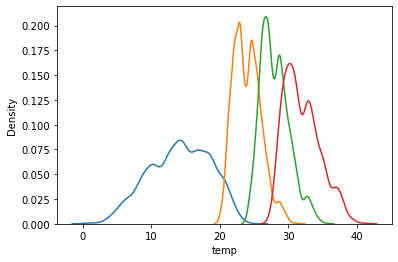

In [109]:
THI_1=train[train['THI_1']==1]
THI_2=train[train['THI_2']==1]
THI_3=train[train['THI_3']==1]
THI_4=train[train['THI_4']==1]
sns.distplot(THI_1['temp'],hist=False)
sns.distplot(THI_2['temp'],hist=False)
sns.distplot(THI_3['temp'],hist=False)
sns.distplot(THI_4['temp'],hist=False)

In [110]:
train.loc[train['THI']<68.'THI_type'] = 1
train.loc[train['THI']>=68)&(train['THI']<75).'THI_type'] = 2
train.loc[train['THI']>=75)&(train['THI']<80).'THI_type'] = 3
train.loc[train['THI']>=80.'THI_type'] = 4

train[(train['THI']>=68)]


SyntaxError: invalid syntax (<ipython-input-110-86ede3fc2c24>, line 1)

## 문제 풀이

1. test.csv 파일을 아래와 같이 불러오세요.
![문제1](문제1.jpg)

In [10]:
# code를 적으세요.

2. test.csv 파일을 활용하여 아래와 같이 도출해보세요.
![문제2](문제2.jpg)

In [11]:
# code를 적으세요.

3. test.csv 파일을 활용하여 datetime 컬럼을 추가해보세요.
![문제3](문제3.jpg)

In [12]:
# code를 적으세요.

4-1. train 데이터를 활용하여 아래 그래프를 도출해보세요.
![문제4](문제4.jpg)

In [13]:
# code를 적으세요.

4-2. train 데이터를 활용하여 아래 그래프를 도출해보세요.
![문제4-2](문제4-2.jpg)

In [14]:
# code를 적으세요.

4-3. train 데이터를 활용하여 아래 그래프를 도출해보세요.
![문제4-3](문제4-3.jpg)

In [15]:
# code를 적으세요.

4-4. train 데이터를 활용하여 아래 그래프를 도출해보세요.
![문제4-4](문제4-4.jpg)

In [16]:
# code를 적으세요.

5. train 데이터를 활용하여 아래 그래프를 도출해보세요.
![문제5](문제5.jpg)

In [17]:
# code를 적으세요.

6-1. train 데이터를 활용하여 아래 그래프를 도출해보세요.
![문제6](문제6.jpg)

In [18]:
# code를 적으세요.

6-2. train 데이터를 활용하여 아래 그래프를 도출해보세요.
![문제6-2](문제6-2.jpg)

In [19]:
# code를 적으세요.

7. train 데이터를 활용하여 temp 와 atemp을 빼서 temp(diff)을 구하고 astype()을 활용하여 아래와 같은 dataframe을 도출해보세요.
![문제7](문제7.jpg)

In [20]:
# code를 적으세요.

8. train 데이터를 활용하여 아래 그래프를 도출해보세요.
![문제8](문제8.jpg)

In [21]:
# code를 적으세요.

9. 연도 별로 아래 그래프를 도출해보세요. 2011년이 일부분만 나옵니다. 없는 이유는 test 데이터에서 계산해야될 값들이기 때문입니다.
![문제9](문제9.jpg)

In [22]:
# code를 적으세요.

9-2. train의 컬럼을 아래와 같이 도출해보세요.
![문제9-2](문제9-2.jpg)

In [23]:
# code를 적으세요.

9-3. train의 컬럼을 활용해서 새로운 dataframe을 만드는데 아래의 컬럼만 나오도록 만드세요.
![문제9-3](문제9-3.jpg)

In [24]:
# code를 적으세요.

10. 위 dataframe 데이터를 활용하여 아래와 같은 heatmap을 도출해보세요.
![문제10](문제10.jpg)

In [25]:
# code를 적으세요.

11. heatmap에서 count와 temp(diff)간 상관성이 적어 보입니다. boxplot으로 아래와 같이 도출해서 왜 그런지 생각해봅시다. 
![문제11](문제11.jpg)

In [26]:
# code를 적으세요.